<a href="https://colab.research.google.com/github/yeb2Binfang/ECE-GY-9163-ML-cyber/blob/main/Lab/MLSec_Lab0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## Univariate linear regression

The code below generates a synthetic training dataset assuming that the response y is a linear function of an attribute x. This is referred to as a generative model.

Complete the code to determine the the optimal linear regression coefficients for the data that minimizes mean square error using (1) analytical expression we learned in class; and (2) using the "polyfit" and "polyval" functions from the numpy.polynomial.polynomial class.


### Generate Data

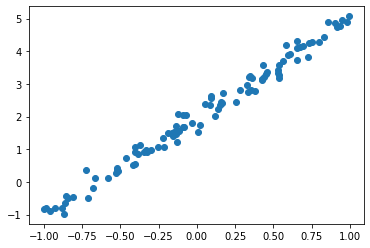

In [26]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

nsamp = 100;
wstd = 0.2;
beta = np.array([2,3]);

# Training data points
xd = np.random.uniform(-1,1,nsamp);
y0 = poly.polyval(xd,beta);
yd = y0 + np.random.normal(0,wstd,nsamp);

fig, ax = plt.subplots()
ax.scatter(xd, yd)

### Analytical Model

**Q1**: Complete the code below using closed form expressions for $\beta_0, \beta_1$.


In [27]:
#Analytical model
xm = np.mean(xd)
ym = np.mean(yd)
syy = np.mean((yd-ym)**2)
syx = np.mean((yd-ym)*(xd-xm))
sxx = np.mean((xd-xm)**2)
beta1 = syx/sxx
beta0 = ym - beta1*xm
analyticalModel = np.array([beta0,beta1])
print("beta1 = ",beta1)
print("beta0 = ",beta0)

beta1 =  3.009516856475304
beta0 =  1.9790690140335803


### Evaluate Your Model

**Q2**: Obtain predictions from your analytical model for randomly generated inputs. Next use the in-built polyfit function to do the same. 

**Analytical Model Result**

In [28]:
#evaluate your model

# new data
# generate uniform points between -1 and 1
xplot = np.random.uniform(-1,1,nsamp);

# prediction
# get prediction on data xplot
ypredict = beta0 + beta1*xplot


**Polyfit Model Prediction**

In [29]:
#use the polyfit function
polyfitModel = poly.polyfit(xd,yd,1)
# use the polyval function to evaluate polyfitModel at x = xplot 
yfit = poly.polyval(xplot, polyfitModel)

### Plot Result

**Q3**: Plot results of polyfit model and analytical model. The plots should contain both the (x,y) training data points and the fitted lines.

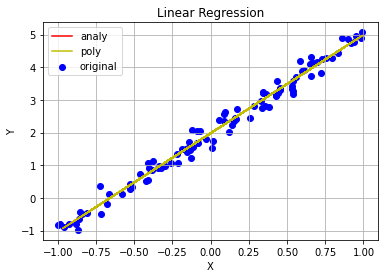

In [30]:
#plot your results
fig, ax = plt.subplots()
ax.scatter(xd, yd,c='b')

# Plot polyfit model and analytical model result:
# Your Code
ax.plot(xplot, ypredict,'r')
ax.plot(xplot,yfit,'y')
ax.legend(["analy","poly","original"])
ax.set(xlabel='X', ylabel='Y',
       title='Linear Regression')
ax.grid()
plt.show()

## Application of Linear Regression

In this part, you'll use Linear Regression on a real-world dataset. The datatset contains sales number of a product versus the advertising of the product on TV, radio and newspaper. The question we want to ask is how advertising on each of these channels impacts sales.

### Read Data



In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
url = 'https://www.statlearning.com/s/Advertising.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Q4**: Split data into train and test, by reserving **70** percent of the data for training and the rest for test. 

In [32]:
X_TV = df["TV"]
X_radio = df["radio"]
X_newspaper = df["newspaper"]
y = df["sales"]
# train, test = # Use function or your own code to split df
X_TV_train, X_TV_test, y_TV_train, y_TV_test = train_test_split(X_TV, y, test_size=0.3, random_state=42)
X_radio_train, X_radio_test, y_radio_train, y_radio_test = train_test_split(X_radio, y, test_size=0.3, random_state=42)
X_newspaper_train, X_newspaper_test, y_newspaper_train, y_newspaper_test = train_test_split(X_newspaper, y, test_size=0.3, random_state=42)

### Linear Regression Model

**Q5**: Use linear regression model to describe sales as a linear function  of advertising on TV, newspaper, and radio. That is, you should independently regress sales against advertising on each of these media.

In [33]:
from sklearn.linear_model import LinearRegression
X_TV_train=np.array(X_TV_train).reshape((-1,1))
X_radio_train=np.array(X_radio_train).reshape((-1,1))
X_newspaper_train=np.array(X_newspaper_train).reshape((-1,1))

## fit model
reg_TV = LinearRegression().fit(X_TV_train, y_TV_train)
reg_radio = LinearRegression().fit(X_radio_train, y_radio_train)
reg_newspaper = LinearRegression().fit(X_newspaper_train, y_newspaper_train)

# Use function or your own code to do linear regression
sales_TV_beta     = reg_TV.coef_[0]
sales_newspaper_beta  = reg_radio.coef_[0]
sales_radio_beta    = reg_newspaper.coef_[0]
print("sales_TV_beta: ",sales_TV_beta)
print("sales_newspaper_beta: ",sales_newspaper_beta)
print("sales_radio_beta: ",sales_radio_beta)

sales_TV_beta:  0.046407802128152764
sales_newspaper_beta:  0.21926677369021058
sales_radio_beta:  0.06093416696535276


### Plot Data

**Q6**: Use the models to do prediction and plot *test* data points and predctions of 3 models

Text(0.5, 1.0, 'radio')

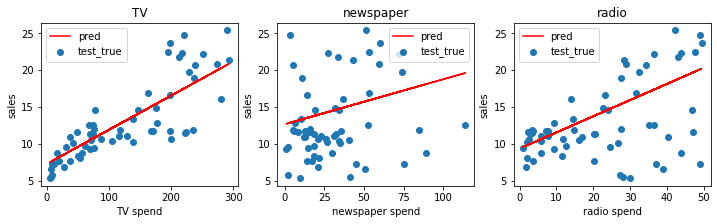

In [38]:
fig = plt.figure(figsize=(12,3))

## Sales to TV spend
plt.subplot(1,3,1)
X_TV_test=np.array(X_TV_test).reshape((-1,1))
y_TV_pred = reg_TV.predict(X_TV_test)
plt.scatter(X_TV_test, y_TV_test)
plt.plot(X_TV_test, y_TV_pred,'r')
plt.legend(["pred","test_true"])
plt.xlabel("TV spend")
plt.ylabel("sales")
plt.title("TV")

## Sales to newspaper spend
plt.subplot(1,3,2)
X_newspaper_test=np.array(X_newspaper_test).reshape((-1,1))
y_newspaper_pred = reg_newspaper.predict(X_newspaper_test)
plt.scatter(X_newspaper_test, y_newspaper_test)
plt.plot(X_newspaper_test, y_newspaper_pred,'r')
plt.legend(["pred","test_true"])
plt.xlabel("newspaper spend")
plt.ylabel("sales")
plt.title("newspaper")

## Sales to radio spend
plt.subplot(1,3,3)
X_radio_test=np.array(X_radio_test).reshape((-1,1))
y_radio_pred = reg_radio.predict(X_radio_test)
plt.scatter(X_radio_test, y_radio_test)
plt.plot(X_radio_test, y_radio_pred,'r')
plt.legend(["pred","test_true"])
plt.xlabel("radio spend")
plt.ylabel("sales")
plt.title("radio")


## Multivariate Linear Regression

**Q7**: Use all three features ('TV', 'Radio', newspaper') to predict sales using multivariate linear regression.

In [39]:
# Define training X, y matrix
X = df[["TV","radio","newspaper"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = np.column_stack((np.transpose(np.ones(len(X_train))),np.array(X_train)))

# # Get your Model(Using the closed form in class)
multivariate_beta =  np.linalg.inv(np.transpose(X_train).dot(X_train)).dot(np.transpose(X_train)).dot(y_train)
print(multivariate_beta)

[2.70894909 0.04405928 0.1992875  0.00688245]


### Evaluate Model

**Q8**: use your multivariate model to do predictions on test data

In [40]:
# # Define testing X matrix
# X = np.vstack((np.ones(test['newspaper'].size), test['newspaper'], test['radio'], test['TV']))
# testX = X.transpose()

# # Define testing Y matrix
# testY = test['sales']

# Predcit result using your model multivariate_beta
pred = multivariate_beta[0] + multivariate_beta[1]*X_test["TV"] + multivariate_beta[2]*X_test["radio"] + multivariate_beta[3]*X_test["newspaper"]


We can check R-square too

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.8609466508230369

### Plot Result

**Q9**: Plot your predictions against real labels.

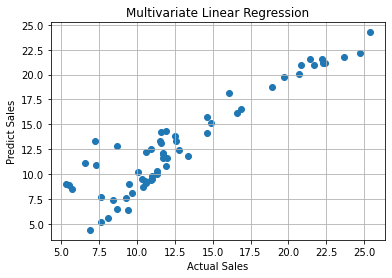

In [42]:
fig, ax = plt.subplots()

# Your Code
ax.scatter(y_test, pred)


ax.set(xlabel='Actual Sales', ylabel='Predict Sales',
       title='Multivariate Linear Regression')
ax.grid()
plt.show()